In [1]:
from pylab import arange

# Del 0: Vi kan indeksere arrayer for å hente ut eller oppdatere elementer

I dette opplegget skal vi simulere biologiske system ved hjelp av rekursive rekker. Tidligere har vi brukt rekursive rekker for å simulere renter på en bankkonto, men vi så kun på et og et år om gangen. Men hva om vi ønsker å plotte pengeutviklingen som funksjon av tid. Vel da må vi kunne lagre pengene vi har på bankkontoen vår, og for å gjøre det bruker vi array-indeksering.

Det har seg nemlig slik at om vi har en array, `x`, så kan vi hente ut element fra denne arrayen med klammeparanteser, det første elementet i `x`-arrayen vår kan vi få tak i ved å skrive `x[0]`, det andre kan vi få ved å skrive `x[1]`, osv. Vi teller altså fra null her og. Under har vi en figur som viser hvordan dette virker for en array med åtte element i seg.

<img src="bilder/array_indexing.png" width="600px">

La oss nå se på et lite eksempel:

In [2]:
x = arange(5)
print(x)
print(x[0])

[0 1 2 3 4]
0


Vi kan og endre verdien til et element i arrayet, hvis vi vil endre verdien til det første elementet i arrayen vår til `9`, kan vi skrive `x[0] = 9`. La oss se på det.

In [3]:
x[0] = 9

print(x)

[9 1 2 3 4]


# Del 1: Simulere populasjoner med rekursive formler og indeksering

<img src="bilder/kaniner_1.png" align="right">

La oss se for oss at vi har en øy med $200$ kaniner på, også skal vi simulere hvordan kaninbefolkningen endrer seg. Det første, enkleste eksempelet vil jo være at det er en konstant økning av kaniner hvert år, f.eks. kan det bli født 100 nye kaniner hvert år. Matematisk, så kan vi skrive den modellen slik:

$ \Huge{k_{t+1} = k_t + 100}, $

hvor $k_t$ er antall kaniner etter $t$ år. Hvis vi vil skrive det med Python, så skriver vi 

<code style="font-size: 22pt">k[t+1] = k[t] + 100</code>

Det er altså nesten likt den matematiske formen! La oss kode dette.


In [12]:
from pylab import zeros # Importere zeros for å lage en "tom array" med nuller

antall_år = 10 

k = zeros(antall_år)
print("Tom array til å begynne med", k)

k[0] = 200

for t in range(antall_år-1):
    k[t+1] = k[t] + 100

print("Array med simuleringsresultater", k)

Tom array til å begynne med [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Array med simuleringsresultater [ 200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100.]


# Del 2: Eksponentiell vekst

Den lineære veksten vi så i forrige eksempel er veldig urealistisk. Vekstraten til dyrene våre våre er jo ikke uavhengig av hvor mange dyr vi har i det biologiske systemet vårt. Hvis vi ikke har noen dyr på øya, så kan vi vel ikke få 100 kaniner neste år!? Hvis vi har to kaniner, så vil vekstraten være mindre enn hvis vi har 4 kaniner, for det er jo bare halvparten så mange som kan få nye kaninunger. Det er derfor naturlig å tenke at vekstraten til kaniner er proposjonal med antall kaniner vi har på øya, altså blir den slik:

$ \Large{k_{t+1} = k_{t} + f k_{t}}, $

hvor $k_t$ er antall kaniner i år $t$, $k_{t+1}$ er antall kaniner året etter og $f$ er fødselsraten. Om vi bruker denne modellen for å simulere systemet vårt så vil jo ingen kaniner dø. Igjen så vet vi at hvis vi har 100 kaniner så kan dobbelt så mange dø som om vi har 50 kaniner, og det er derfor logisk å tenke at dødsraten er proposjonal med antall kaniner på øya fra før. Matematisk blir det

$ \Large{k_{t+1} = k_{t} + f k_{t} - d k_{t}}, $

hvor $d$ er dødsraten til kaninene. Dette ser vi at vi kan skrive om til å bli


$ \Huge{k_{t+1} = k_{t} + r k_{t}}, $

hvor $r=(f - d)$ er vekstraten til kaninene våre. Hvis vi bruker programmering, så får vi:


<code style="font-size: 22pt">k[t+1] = k[t] + vekstrate*k[t]</code>

La oss simulere systemet med en dødsrate, $d=0.1$ og fødselsrate, $f=0.2$

In [8]:
antall_år = 10

dødsrate = 0.1
fødselsrate = 0.2
vekstrate = fødselsrate - dødsrate # regne ut vekstraten

k = zeros(antall_år)
k[0] = 200

for t in range(antall_år-1):
    k[t+1] = k[t] + vekstrate*k[t]


print("Array med simuleringsresultater", k)

Array med simuleringsresultater [200.        220.        242.        266.2       292.82      322.102
 354.3122    389.74342   428.717762  471.5895382]


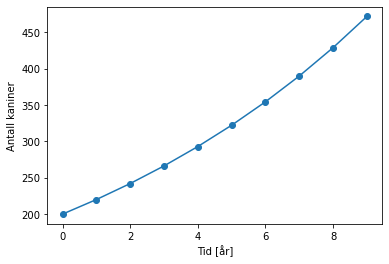

In [9]:
from pylab import plot, show, xlabel, ylabel

plot(range(antall_år), k, '-o')
xlabel('Tid [år]')
ylabel('Antall kaniner')
show()

Men hva skjer om vi simulerer øya over lengre tid? For å utforske det kan vi lage glidebryter for antall år og vekstraten

In [10]:
from ipywidgets import interact

def plott_befolkning(antall_år, vekstrate):

    k = zeros(antall_år)
    k[0] = 200

    for t in range(antall_år-1):
        k[t+1] = k[t] + vekstrate*k[t]

    plot(range(antall_år), k, '-o')
    xlabel('Tid [år]')
    ylabel('Antall kaniner')
    show()
    
interact(plott_befolkning, antall_år=(0, 100), vekstrate=(0.1, 0.5))

interactive(children=(IntSlider(value=50, description='antall_år'), FloatSlider(value=0.30000000000000004, des…

<function __main__.plott_befolkning(antall_år, vekstrate)>

Det vi ser her er at det tar ikke lang tid før det blir kjempemange kaniner, nesten uansett hvor lav vi stiller vekstraten. For en vekstrate på 0.1 har vi 2.5 millioner kaniner etter 100 år! 